In [1]:
from executor import execute
from verifier import verify
import json

# load ONE example
with open("geometry_dataset_v1.jsonl") as f:
    ex = json.loads(next(f))

res = execute(ex["program_ast"])
vr = verify(res, ex["constraints"])

print("Passed:", vr.passed)
for c in vr.per_constraint:
    print(c.constraint["type"], "→", c.passed, "|", c.message)

Passed: True
bbox_width → True | bbox_width_units=12.539, target=12.600, rel_err=0.005
bbox_height → True | bbox_height_units=3.367, target=3.400, rel_err=0.010
num_components → True | num_components=1, target=1
has_hole → True | has_hole=False, target=False


In [2]:
failures = []

with open("geometry_dataset_v1.jsonl") as f:
    for i, line in enumerate(f):
        ex = json.loads(line)
        res = execute(ex["program_ast"])
        vr = verify(res, ex["constraints"])
        if not vr.passed:
            failures.append((i, vr))

print("Total examples:", i + 1)
print("Failures:", len(failures))

Total examples: 80
Failures: 0


In [3]:
for idx, vr in failures[:10]:
    print("Example", idx)
    for fc in vr.failed_constraints:
        print("  ", fc.constraint["type"], fc.message)

(-0.5, 255.5, 255.5, -0.5)

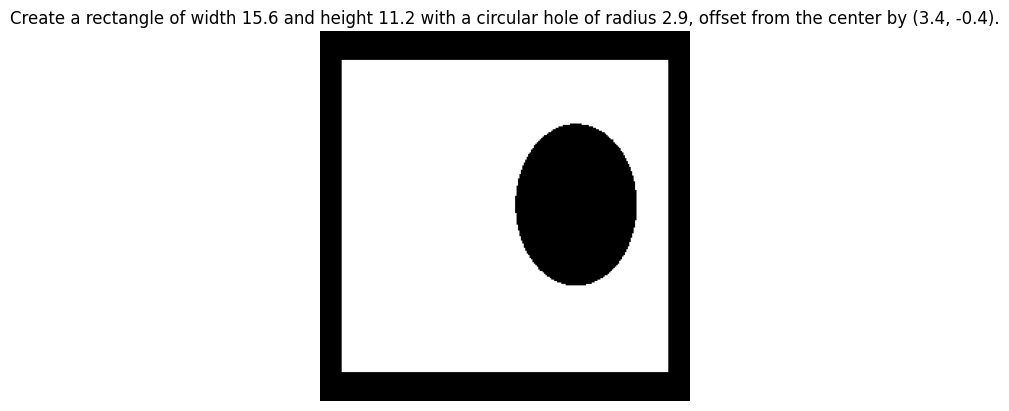

In [4]:
import matplotlib.pyplot as plt

plt.imshow(res.mask, cmap="gray")
plt.title(ex["prompt"])
plt.axis("off")